<h1><center>Project 2 - Face Detection in Python</center></h1>
<h3><center>Linh Nguyen (30019908)</center></h3>
<h3><center>Nafisa Tabassum (10172713)</center></h3>
<h3><center>Pauline Abalos (30011136)</center></h3>

In [167]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

from skimage.exposure import equalize_hist, equalize_adapthist

## Utility functions

In [168]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def convertToGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def gtb_coordinates(label_path):
    with open(label_path) as file:
        data = file.read().replace('\n', '');
        coords = data.split(' ')
    return coords

## Pre-processing

Text(0.5, 1.0, 'Subject 5')

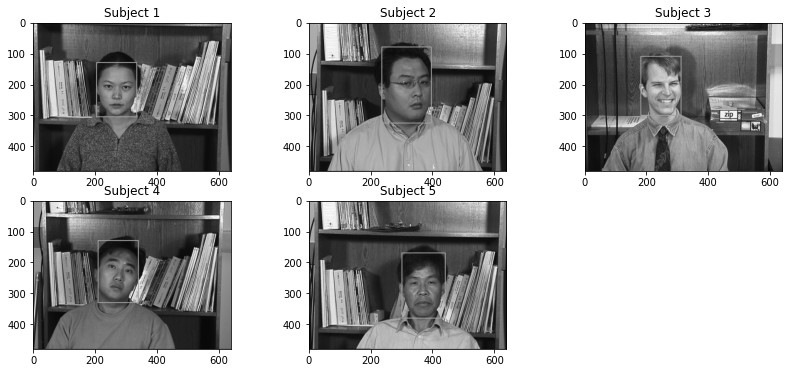

In [169]:
# Generate ground truth bounding boxes in green from provided label files
s1 = cv2.imread('dataset/s1.jpg')
s2 = cv2.imread('dataset/s2.jpg')
s3 = cv2.imread('dataset/s3.jpg')
s4 = cv2.imread('dataset/s4.jpg')
s5 = cv2.imread('dataset/s5.jpg')

s1_coords = gtb_coordinates('labels/lab581')
s2_coords = gtb_coordinates('labels/lab790')
s3_coords = gtb_coordinates('labels/lab364')
s4_coords = gtb_coordinates('labels/lab935')
s5_coords = gtb_coordinates('labels/lab869')

# (x,y,w,h) -> (x_left, y_top, x_right, y_bottom)
s1_gtb = cv2.rectangle(s1, (int(s1_coords[0]), int(s1_coords[1])), (int(s1_coords[2]), int(s1_coords[3])), (0,255,0), 2)
s2_gtb = cv2.rectangle(s2, (int(s2_coords[0]), int(s2_coords[1])), (int(s2_coords[2]), int(s2_coords[3])), (0,255,0), 2)
s3_gtb = cv2.rectangle(s3, (int(s3_coords[0]), int(s3_coords[1])), (int(s3_coords[2]), int(s3_coords[3])), (0,255,0), 2)
s4_gtb = cv2.rectangle(s4, (int(s4_coords[0]), int(s4_coords[1])), (int(s4_coords[2]), int(s4_coords[3])), (0,255,0), 2)
s5_gtb = cv2.rectangle(s5, (int(s5_coords[0]), int(s5_coords[1])), (int(s5_coords[2]), int(s5_coords[3])), (0,255,0), 2)

# Convert to grayscale
s1_gray = convertToGray(s1_gtb)
s2_gray = convertToGray(s2_gtb)
s3_gray = convertToGray(s3_gtb)
s4_gray = convertToGray(s4_gtb)
s5_gray = convertToGray(s5_gtb)

plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(s1_gray, cmap='gray'); plt.title("Subject 1")
plt.subplot(2,3,2)
plt.imshow(s2_gray, cmap='gray'); plt.title("Subject 2")
plt.subplot(2,3,3)
plt.imshow(s3_gray, cmap='gray'); plt.title("Subject 3")
plt.subplot(2,3,4)
plt.imshow(s4_gray, cmap='gray'); plt.title("Subject 4")
plt.subplot(2,3,5)
plt.imshow(s5_gray, cmap='gray'); plt.title("Subject 5")

## Original Haar Cascades

### Experiment 1 - scaleFactor=1.1, minNeighbors=4

Text(0.5, 1.0, 'Subject 5')

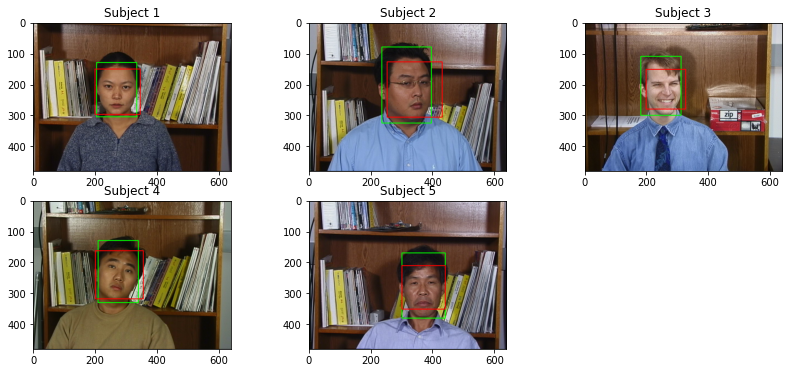

In [170]:
def original_haar_cascades(image, image_gray, scaleFactor, minNeighbors):
    haar_cascade_face = cv2.CascadeClassifier('haar_xml/haarcascade_frontalface_default.xml')
    face_rects = haar_cascade_face.detectMultiScale(image_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    predicted_box_coords = []

    for (x,y,w,h) in face_rects:
        predicted_box_coords.append(x)
        predicted_box_coords.append(y)
        predicted_box_coords.append(x+w)
        predicted_box_coords.append(y+h)
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,0,255), 2)
    
    return convertToRGB(image), predicted_box_coords

s1_haar = original_haar_cascades(s1_gtb, s1_gray, 1.1, 4)[0]
s2_haar = original_haar_cascades(s2_gtb, s2_gray, 1.1, 4)[0]
s3_haar = original_haar_cascades(s3_gtb, s3_gray, 1.1, 4)[0]
s4_haar = original_haar_cascades(s4_gtb, s4_gray, 1.1, 4)[0]
s5_haar = original_haar_cascades(s5_gtb, s5_gray, 1.1, 4)[0]

s1_boxB_exp1 = original_haar_cascades(s1_gtb, s1_gray, 1.1, 4)[1]
s2_boxB_exp1 = original_haar_cascades(s2_gtb, s2_gray, 1.1, 4)[1]
s3_boxB_exp1 = original_haar_cascades(s3_gtb, s3_gray, 1.1, 4)[1]
s4_boxB_exp1 = original_haar_cascades(s4_gtb, s4_gray, 1.1, 4)[1]
s5_boxB_exp1 = original_haar_cascades(s5_gtb, s5_gray, 1.1, 4)[1]

# Predicted bounding box in red
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(s1_haar); plt.title("Subject 1")
plt.subplot(2,3,2)
plt.imshow(s2_haar); plt.title("Subject 2")
plt.subplot(2,3,3)
plt.imshow(s3_haar); plt.title("Subject 3")
plt.subplot(2,3,4)
plt.imshow(s4_haar); plt.title("Subject 4")
plt.subplot(2,3,5)
plt.imshow(s5_haar); plt.title("Subject 5")

### Experiment 2 - scaleFactor=1.2, minNeighbors=6

Text(0.5, 1.0, 'Subject 5')

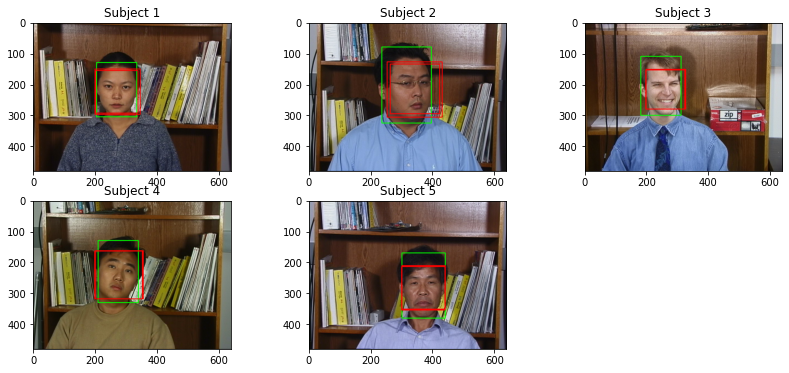

In [171]:
s1_exp2 = original_haar_cascades(s1_gtb, s1_gray, 1.2, 6)[0]
s2_exp2 = original_haar_cascades(s2_gtb, s2_gray, 1.2, 6)[0]
s3_exp2 = original_haar_cascades(s3_gtb, s3_gray, 1.2, 6)[0]
s4_exp2 = original_haar_cascades(s4_gtb, s4_gray, 1.2, 6)[0]
s5_exp2 = original_haar_cascades(s5_gtb, s5_gray, 1.2, 6)[0]

s1_boxB_exp2 = original_haar_cascades(s1_gtb, s1_gray, 1.2, 6)[1]
s2_boxB_exp2 = original_haar_cascades(s2_gtb, s2_gray, 1.2, 6)[1]
s3_boxB_exp2 = original_haar_cascades(s3_gtb, s3_gray, 1.2, 6)[1]
s4_boxB_exp2 = original_haar_cascades(s4_gtb, s4_gray, 1.2, 6)[1]
s5_boxB_exp2 = original_haar_cascades(s5_gtb, s5_gray, 1.2, 6)[1]

# Predicted bounding box in red
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.imshow(s1_exp2); plt.title("Subject 1")
plt.subplot(2,3,2)
plt.imshow(s2_exp2); plt.title("Subject 2")
plt.subplot(2,3,3)
plt.imshow(s3_exp2); plt.title("Subject 3")
plt.subplot(2,3,4)
plt.imshow(s4_exp2); plt.title("Subject 4")
plt.subplot(2,3,5)
plt.imshow(s5_exp2); plt.title("Subject 5")

### Intersection over Union (IoU)

In [172]:
def bb_intersection_over_union(boxA, boxB):
    # Determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
    return iou

#### Experiment 1 IoU

In [173]:
s1_boxA = [int(s1_coords[0]), int(s1_coords[1]), int(s1_coords[2]), int(s1_coords[3])]
s2_boxA = [int(s2_coords[0]), int(s2_coords[1]), int(s2_coords[2]), int(s2_coords[3])]
s3_boxA = [int(s3_coords[0]), int(s3_coords[1]), int(s3_coords[2]), int(s3_coords[3])]
s4_boxA = [int(s4_coords[0]), int(s4_coords[1]), int(s4_coords[2]), int(s4_coords[3])]
s5_boxA = [int(s5_coords[0]), int(s5_coords[1]), int(s5_coords[2]), int(s5_coords[3])]

print("----------Experiment 1----------")
print("Subject 1 IoU: {}".format(bb_intersection_over_union(s1_boxA, s1_boxB_exp1)))
print("Subject 2 IoU: {}".format(bb_intersection_over_union(s2_boxA, s2_boxB_exp1)))
print("Subject 3 IoU: {}".format(bb_intersection_over_union(s3_boxA, s3_boxB_exp1)))
print("Subject 4 IoU: {}".format(bb_intersection_over_union(s4_boxA, s4_boxB_exp1)))
print("Subject 5 IoU: {}".format(bb_intersection_over_union(s5_boxA, s5_boxB_exp1)))

----------Experiment 1----------
Subject 1 IoU: 0.7579108942065491
Subject 2 IoU: 0.5619236554685967
Subject 3 IoU: 0.5455557204332987
Subject 4 IoU: 0.6759948397340478
Subject 5 IoU: 0.6682464454976303


#### Experiment 2 IoU

In [174]:
print("----------Experiment 2----------")
print("Subject 1 IoU: {}".format(bb_intersection_over_union(s1_boxA, s1_boxB_exp2)))
print("Subject 2 IoU: {}".format(bb_intersection_over_union(s2_boxA, s2_boxB_exp2)))
print("Subject 3 IoU: {}".format(bb_intersection_over_union(s3_boxA, s3_boxB_exp2)))
print("Subject 4 IoU: {}".format(bb_intersection_over_union(s4_boxA, s4_boxB_exp2)))
print("Subject 5 IoU: {}".format(bb_intersection_over_union(s5_boxA, s5_boxB_exp2)))

----------Experiment 2----------
Subject 1 IoU: 0.7525601531929065
Subject 2 IoU: 0.4908424908424908
Subject 3 IoU: 0.5501977773592014
Subject 4 IoU: 0.6756846693953612
Subject 5 IoU: 0.660377358490566


### Performance Metrics

In experiment 1, for a threshold of 0.5, there are 5 True Positives, 0 False Positives, and 0 False Negatives. <br>
$$Precision = \frac{TP}{TP + FP} = \frac{5}{5} = 1,\;Recall = \frac{TP}{TP+FN} = \frac{5}{5} = 1$$
In experiment 1, for a threshold of 0.75, there is 1 True Positive, 4 False Positives, and 0 False Negatives. <br>
$$Precision = \frac{TP}{TP + FP} = \frac{1}{1+4} = 0.2, \;Recall = \frac{TP}{TP+FN} = \frac{1}{1} = 1$$
In experiment 2, for a threshold of 0.5, there are 4 True Positives, 1 False Positive, and 0 False Negatives. <br>
$$Precision = \frac{TP}{TP + FP} = \frac{4}{4+1} = 0.8, \;Recall = \frac{TP}{TP+FN} = \frac{4}{4} = 1$$
In experiment 2, for a threshold of 0.75, there is 1 True Positive, 4 False Positives, and 0 False Negatives. <br>
$$Precision = \frac{TP}{TP + FP} = \frac{1}{1+4} = 0.2, \;Recall = \frac{TP}{TP+FN} = \frac{1}{1} = 1$$

## LBP-based Haar Cascades

In [175]:
#code

## HOG+SVM Face Detection

In [176]:
#code